In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
#import dos dados
democracy_data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-11-05/democracy_data.csv'
democracy_data = pd.read_csv(democracy_data_url)


In [7]:
#transformando import em dataframe
df = democracy_data

C:\Users\lenon\AppData\Local\Temp\ipykernel_5468\1669978967.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  regime_changes['maintained_democratic_leader'] = regime_changes['has_free_and_fair_election'].fillna(False)
C:\Users\lenon\AppData\Local\Temp\ipykernel_5468\1669978967.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regime_changes['maintained_democratic_leader'] = regime_changes['has_free_and_fair_election'].fillna(False)


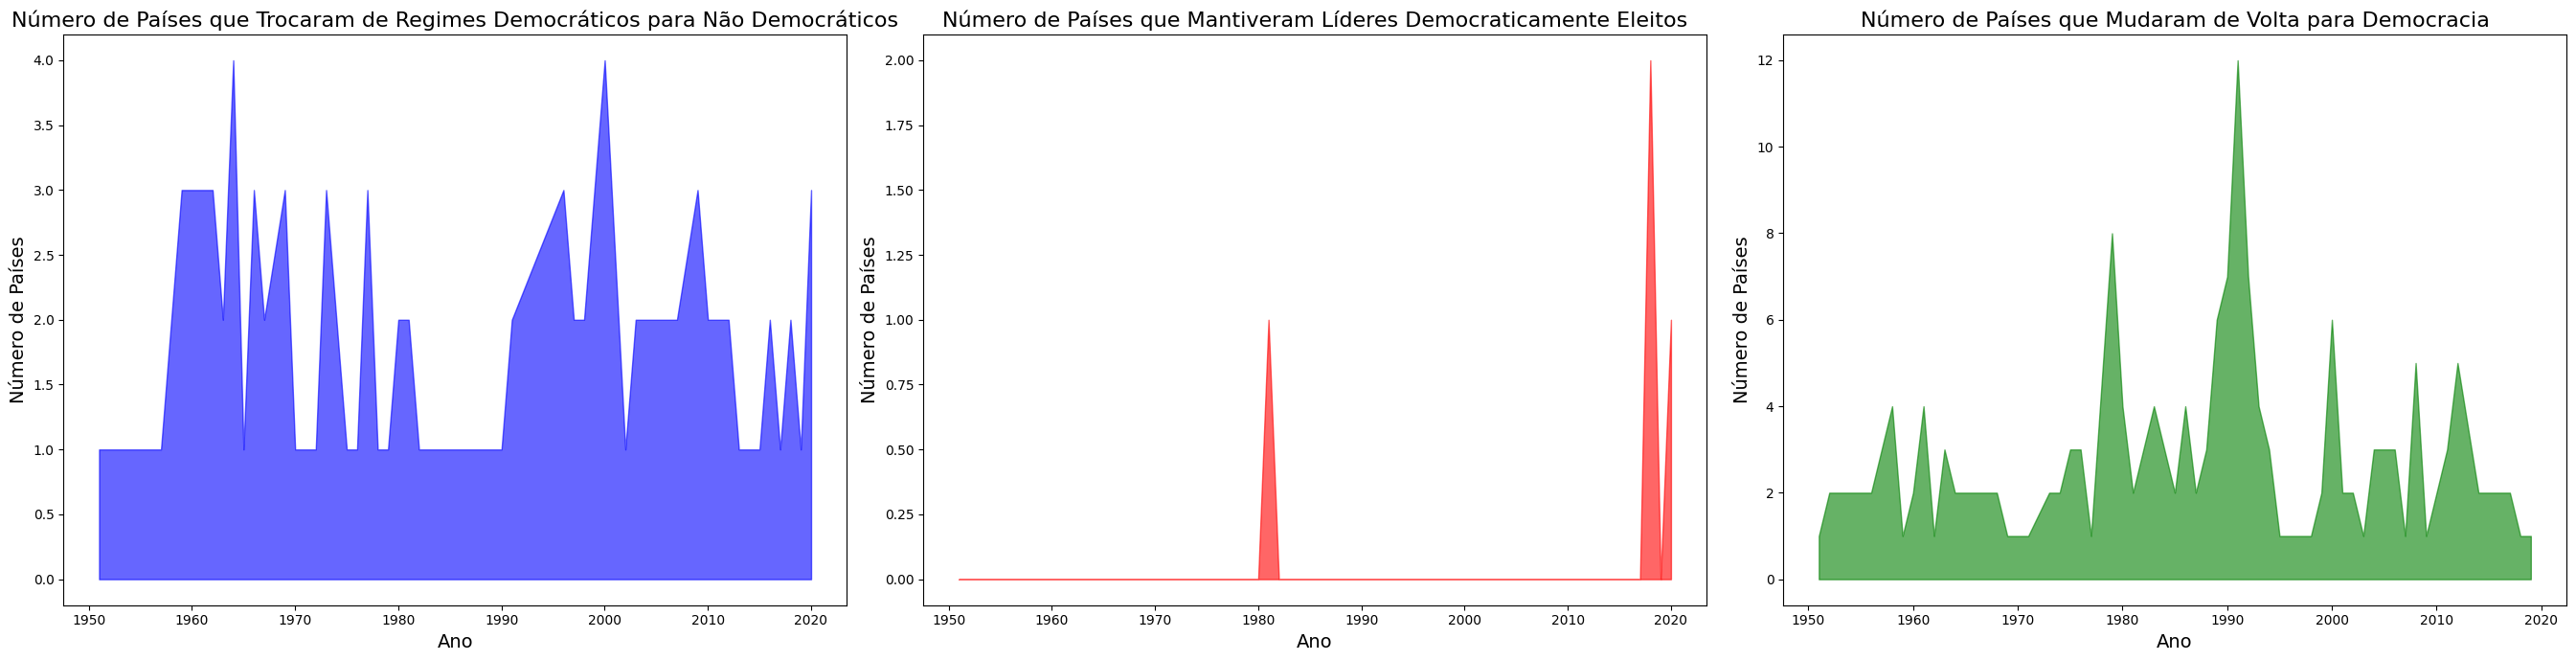

In [8]:

# lista de regimes democráticos
democratic_regimes = [
    "Mixed democratic",
    "Parliamentary democracy",
    "Presidential democracy"
]

# lista de regimes não democráticos
df['is_democratic'] = df['regime_category'].isin(democratic_regimes)

# ordenando por país e ano
df = df.sort_values(by=['country_code', 'year'])

# Cria uma coluna 'prev_is_democratic' pra verificar o regime do ano anterior
df['prev_is_democratic'] = df.groupby('country_code')['is_democratic'].shift(1)

# Identifica mudanças de democrático pra não democrático
regime_changes = df[(df['is_democratic'] == False) & (df['prev_is_democratic'] == True)]

# Contabiliza as trocas por ano (democratico pra não democratico)
regime_changes_by_year = regime_changes.groupby('year').size()

# Identifica mudanças de não democrático pra democrático
regime_changes_back_to_democracy = df[(df['is_democratic'] == True) & (df['prev_is_democratic'] == False)]

# Contabiliza as trocas por ano (de não democratico pra democratico)
regime_changes_back_to_democracy_by_year = regime_changes_back_to_democracy.groupby('year').size()

# Cria a imagem e os subgráficos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(27, 7))  # 1 linha e 3 colunas

# Países que trocaram de regimes democráticos pra não democráticos (Azul)
axes[0].fill_between(regime_changes_by_year.index, regime_changes_by_year.values, color='blue', alpha=0.6)
axes[0].set_title('Número de Países que Trocaram de Regimes Democráticos para Não Democráticos', fontsize=16)
axes[0].set_xlabel('Ano', fontsize=14)
axes[0].set_ylabel('Número de Países', fontsize=14)

# Países que mantiveram líderes democraticamente eleitos (Vermelho)
regime_changes['maintained_democratic_leader'] = regime_changes['has_free_and_fair_election'].fillna(False)
maintained_leader_count = regime_changes.groupby('year')['maintained_democratic_leader'].sum()

axes[1].fill_between(maintained_leader_count.index, maintained_leader_count.values, color='red', alpha=0.6)
axes[1].set_title('Número de Países que Mantiveram Líderes Democraticamente Eleitos', fontsize=16)
axes[1].set_xlabel('Ano', fontsize=14)
axes[1].set_ylabel('Número de Países', fontsize=14)

#Países que mudaram de volta pra democracia (Verde)
axes[2].fill_between(regime_changes_back_to_democracy_by_year.index, regime_changes_back_to_democracy_by_year.values, color='green', alpha=0.6)
axes[2].set_title('Número de Países que Mudaram de Volta para Democracia', fontsize=16)
axes[2].set_xlabel('Ano', fontsize=14)
axes[2].set_ylabel('Número de Países', fontsize=14)

plt.tight_layout()
plt.show()
